In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy

In [4]:
data = pd.read_csv("dataset.csv",";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
data.head()

,DateTime,Смертей за день,Заражений за день,Выздоровлений за день
0,2020-01-22 00:00:00,17,557,30.0
1,2020-01-23 00:00:00,1,100,2.0
2,2020-01-24 00:00:00,8,287,7.0
3,2020-01-25 00:00:00,16,493,3.0
4,2020-01-26 00:00:00,14,683,14.0


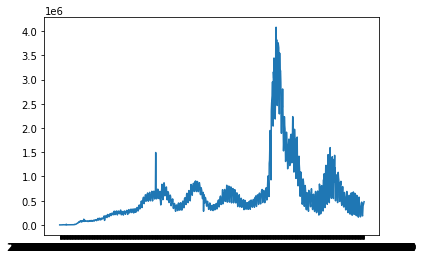

In [22]:
data_cut = data[:]
plt.plot(data_cut['DateTime'], data_cut['Заражений за день'])

In [24]:
spectra = np.fft.fft(data_cut['Заражений за день'])
a = (spectra.real**2 + spectra.imag**2)**(1/2)
theta = np.angle(spectra)

In [41]:
new_x = range(1,len(data_cut['DateTime'])+1)
new_y = np.zeros(data_cut['Заражений за день'].shape)
fd = 1 / np.mean(np.diff(new_x))
for i in range(int(len(new_y) / 8)):
    new_y += np.cos(2 * np.pi * fd/len(new_y) * i * new_x  + theta[i]) * a[i]

In [48]:
fd

1.0

In [43]:
data_cut['Заражений за день']

0          557
1          100
2          287
3          493
4          683
         ...  
1020    324713
1021    435570
1022    422818
1023    453968
1024    479528
Name: Заражений за день, Length: 1025, dtype: int64

### **Высокочастотная периодичность прироста:**

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Прирост по дням')

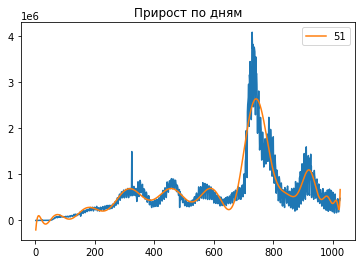

In [79]:
plt.plot(new_x, data_cut['Заражений за день'])
ys = []
for deg in [51]:
    z = np.polyfit(new_x, data_cut['Заражений за день'], deg)
    p = np.poly1d(z)
    new_y = p(new_x)
    plt.plot(new_x, new_y, label=deg)
plt.legend()
plt.title("Прирост по дням")

In [135]:
deriv = np.polyder(p)
deriv2 = np.polyder(deriv)

In [131]:
deriv

poly1d([-7.49900218e-137,  2.55666069e-133, -1.30485960e-130,
       -2.24055149e-127, -3.45670560e-125,  1.71966982e-121,
        2.17467548e-118,  9.32233451e-116, -9.42459769e-113,
       -2.17924353e-109, -2.06270028e-106, -7.22725909e-104,
        1.04611178e-100,  2.25915571e-097,  2.25971128e-094,
        1.03991102e-091, -7.66752327e-089, -2.20576714e-085,
       -2.49077315e-082, -1.42333914e-079,  4.62033480e-077,
        2.13686772e-073,  2.61715320e-070,  1.54675140e-067,
       -5.06799153e-065, -2.28622378e-061, -2.57623055e-058,
       -1.06367003e-055,  1.26645305e-052,  2.64866754e-049,
        1.84892100e-046, -6.06549605e-044, -2.50773847e-040,
       -1.82957470e-037,  9.07953430e-035,  2.52327658e-031,
        7.00405699e-029, -2.15732789e-025, -1.30580927e-022,
        2.02696002e-019,  7.87263767e-017, -2.39747533e-013,
        1.78448363e-010, -7.34999646e-008,  1.90743829e-005,
       -3.21959672e-003,  3.49988051e-001, -2.34706518e+001,
        8.90900949e+002

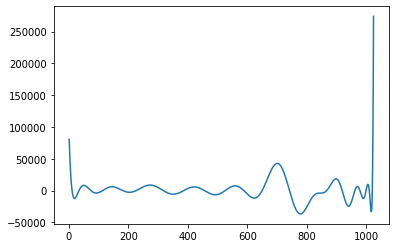

In [132]:
new_y = deriv(new_x)
plt.plot(new_x, new_y, label=deg)

In [133]:
roots=np.roots(deriv)
roots

array([ 1698.41330896   +0.j        , -1006.39450436   +0.j        ,
        -995.1161986  +150.64744795j,  -995.1161986  -150.64744795j,
        -961.45031817 +298.18302368j,  -961.45031817 -298.18302368j,
        -905.91796975 +439.53865862j,  -905.91796975 -439.53865862j,
        -829.39685568 +571.68425196j,  -829.39685568 -571.68425196j,
        -733.05407378 +691.69125525j,  -733.05407378 -691.69125525j,
        -618.38236856 +796.73173476j,  -618.38236856 -796.73173476j,
        -487.1300558  +884.06449472j,  -487.1300558  -884.06449472j,
        -341.25413043 +951.02011454j,  -341.25413043 -951.02011454j,
        -182.85851611 +994.93162714j,  -182.85851611 -994.93162714j,
         -14.02939344+1012.93996996j,   -14.02939344-1012.93996996j,
         163.42010347+1001.54676364j,   163.42010347-1001.54676364j,
         348.77392832 +955.30439325j,   348.77392832 -955.30439325j,
         545.91303061 +861.52376347j,   545.91303061 -861.52376347j,
        1020.8400476    +0.j      

In [182]:
real_valued = roots.real[abs(roots.imag)==0]
extremums = real_valued[real_valued>0]
indexes = np.array([index for index,value in enumerate(roots) if (value.imag == 0)*(value.real>0)])

In [136]:
deriv2

poly1d([-3.74950109e-135,  1.25276374e-131, -6.26332609e-129,
       -1.05305920e-125, -1.59008457e-123,  7.73851417e-120,
        9.56857211e-117,  4.00860384e-114, -3.95833103e-111,
       -8.93489846e-108, -8.25080113e-105, -2.81863105e-102,
        3.97522477e-099,  8.35887614e-096,  8.13496059e-093,
        3.63968858e-090, -2.60695791e-087, -7.27903157e-084,
       -7.97047408e-081, -4.41235134e-078,  1.38610044e-075,
        6.19691640e-072,  7.32802897e-069,  4.17622878e-066,
       -1.31767780e-063, -5.71555945e-060, -6.18295333e-057,
       -2.44644107e-054,  2.78619670e-051,  5.56220183e-048,
        3.69784200e-045, -1.15244425e-042, -4.51392924e-039,
       -3.11027699e-036,  1.45272549e-033,  3.78491487e-030,
        9.80567979e-028, -2.80452626e-024, -1.56697113e-021,
        2.22965602e-018,  7.87263767e-016, -2.15772779e-012,
        1.42758691e-009, -5.14499752e-007,  1.14446298e-004,
       -1.60979836e-002,  1.39995220e+000, -7.04119554e+001,
        1.78180190e+003

In [181]:
indexes2 = np.array([index for index,value in enumerate(deriv2) if value>0])

In [196]:
answer=np.array(extremums[np.array([index for index,value in enumerate(np.in1d(indexes,indexes2)) if value==True])],dtype=int)

In [197]:
answer

array([1020, 1010,  999,  867,  588,  525,  386,  226,  113,   33])

### **Пики заболеваемости:**

In [198]:
data_cut['DateTime'][answer]

1020    2022-11-07 00:00:00
1010    2022-10-28 00:00:00
999     2022-10-17 00:00:00
867     2022-06-07 00:00:00
588     2021-09-01 00:00:00
525     2021-06-30 00:00:00
386     2021-02-11 00:00:00
226     2020-09-04 00:00:00
113     2020-05-14 00:00:00
33      2020-02-24 00:00:00
Name: DateTime, dtype: object